In [1]:
import pandas as pd
import json
from networkx import MultiDiGraph
import os
from config import places_json_path, graph_mining_dir
from panopticapi.utils import load_panoptic_category_info
from semantic_analysis.conceptnet.utils import coco_to_concept, get_coco_concepts_map
from semantic_analysis.conceptnet.utils import get_readable_concepts
from semantic_analysis.conceptnet.places import parse_loc_surface_text, related_to
from semantic_analysis.conceptnet.places import related_to_place, rank_related_places
from semantic_analysis.graph_utils import nx_to_graphviz

## Analyzing places in conceptnet

In [2]:
coco_places = get_readable_concepts(pd.read_csv("../ConceptNet/conceptnet_coco_places.csv", sep='\t', header=None))
meaningful_rel = {'Antonym','RelatedTo', 'AtLocation','IsA','HasA','PartOf','UsedFor','MadeOf','LocatedNear'}
coco_places = coco_places.loc[lambda x: x[1].isin(meaningful_rel)]

with open(places_json_path) as f:
    places_json = json.load(f)
places = places_json['places']+places_json['sub-places']

with open(os.path.join(graph_mining_dir, 'train_freqGraph_kbfilter_prune_gspan_005.json')) as f:
    freq_graphs = json.load(f)

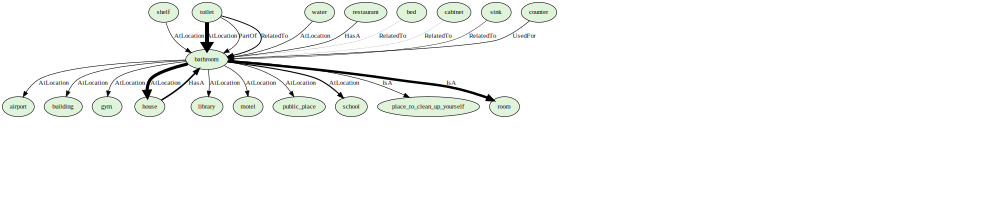

In [4]:
g = related_to(coco_places, ['bathroom'])
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

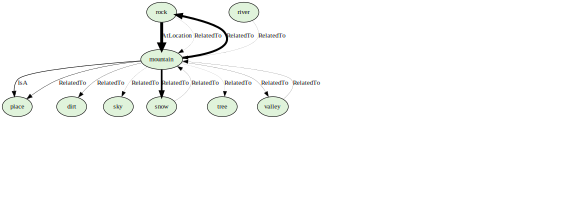

In [5]:
g = related_to(coco_places, ['mountain'])
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

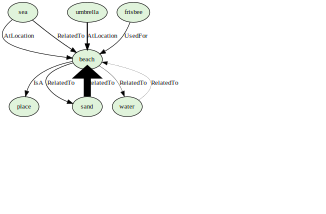

In [6]:
g = related_to(coco_places, ['beach'])
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="40")
gviz

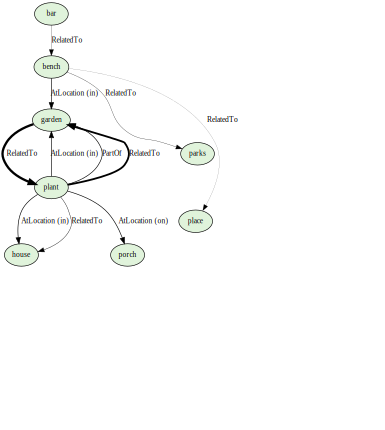

In [7]:
concepts=['plant','bench']
g = related_to_place(coco_places, concepts, places)
gviz = nx_to_graphviz(g)
gviz.graph_attr.update(dpi="45")
gviz

In [8]:
import matplotlib.pyplot as plt
from semantic_analysis.graph_utils import show_graphviz_graph, json_to_graphviz

def associate_graph(g):
    coco_concepts_map = get_coco_concepts_map()
    concepts=[coco_to_concept(n['label'], coco_concepts_map) for n in g['g']['nodes']]
    g_conceptnet = related_to_place(coco_places, concepts, places, antonyms=True)
    #dpi = int(200.0*(len(g_conceptnet.nodes)/10))
    #dpi = min(200,dpi)
    #dpi = max(100,dpi)
    #dpi =200
    fig, ax = plt.subplots(figsize=[12,6])#dpi=dpi)# figsize=[12,6],
    g_viz = nx_to_graphviz(g_conceptnet)
    #g_viz.graph_attr.update(dpi="50")
    show_graphviz_graph(g_viz, ax)
    ax.set_title("Conceptnet")
    fig, ax = plt.subplots()# figsize=[12,6],
    show_graphviz_graph(json_to_graphviz(g['g']), ax)
    ax.set_title("Frequent graph")
    plt.tight_layout()
    print(rank_related_places(g_conceptnet, concepts)[:4])

[('kitchen', 5.292), ('room', 3.612), ('house', 3.0), ('place', 2.069)]


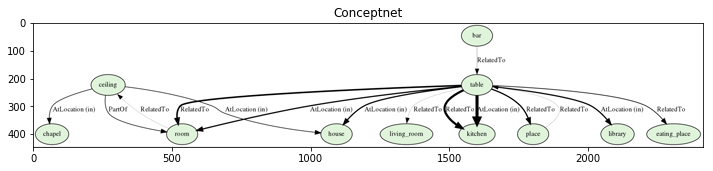

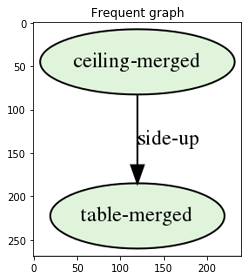

In [9]:
associate_graph(freq_graphs[25])

[('town', 4.464), ('countryside', 2.828), ('garden', 2.537), ('city', 2.388)]


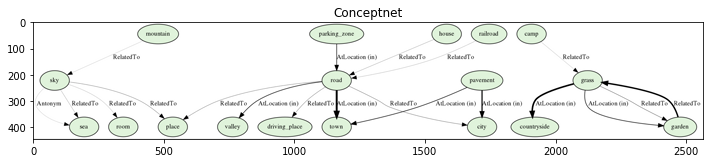

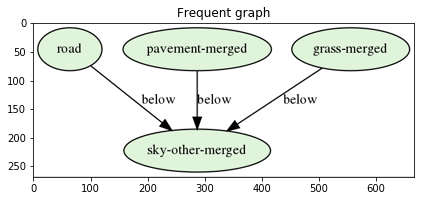

In [10]:
associate_graph(freq_graphs[62])

[('kitchen', 6.928), ('house', 6.839), ('room', 4.9079999999999995), ('chapel', 1.0)]


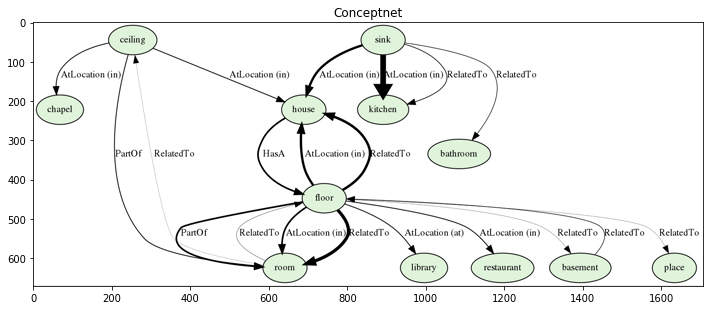

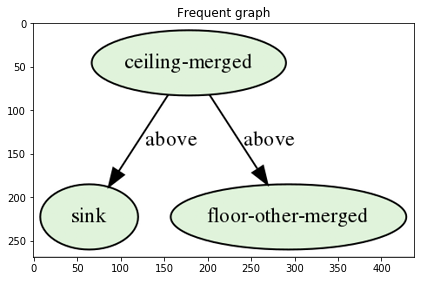

In [11]:
associate_graph(freq_graphs[100])

[('beach', 13.956999999999999), ('desert', 5.868), ('place', 1.0459999999999998), ('room', 0.173)]


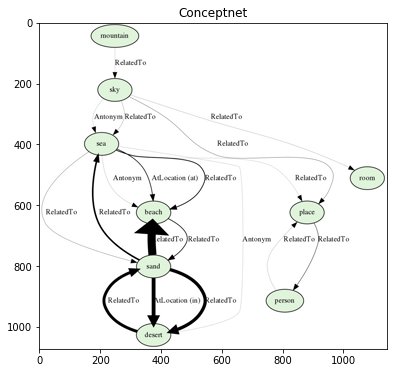

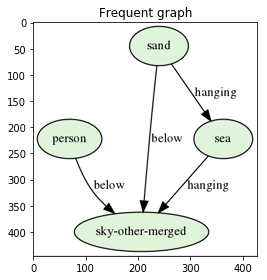

In [12]:
associate_graph(freq_graphs[329])

[('garden', 3.537), ('countryside', 2.828), ('place', 0.9179999999999999), ('mountain', 0.49)]


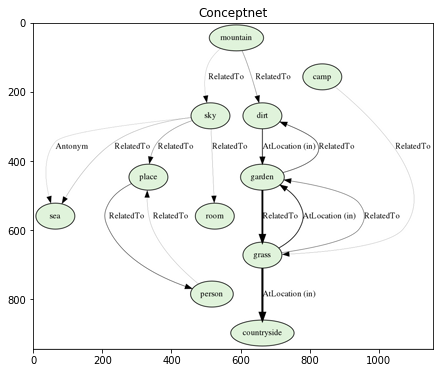

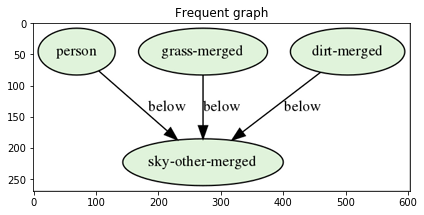

In [13]:
associate_graph(freq_graphs[281])

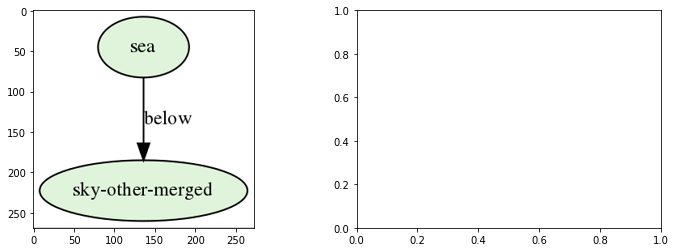

In [14]:
from config import graph_mining_dir

with open(os.path.join(graph_mining_dir, 'train_freqGraph_kbfilter_prune_gspan_01.json')) as f:
    freq_graphs = json.load(f)

fig, ax = plt.subplots(1,2,figsize=[12,4])
show_graphviz_graph(json_to_graphviz(freq_graphs[30]['g']), ax[0])